In [9]:
#Importing packages
import requests
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [10]:
#DMI requires a personal key to access their API
api_key = '12a4bffe-21d5-4154-96e5-12bf959cc1dd'

In [11]:
#Defining URL for the API
url = 'https://dmigw.govcloud.dk/metObs/v1/observation'

In [12]:
#Defining data period
end_time = pd.datetime.today()
start_time = pd.datetime(2018,1,1)

#Creates function that convertes datetime objects to Unix microsecond string
def date_time(dt):
    '''
    Function convertes datetime objects to Unix microsecond string
    '''
    return str(int(pd.to_datetime(dt).value*10**-3))

#Specifying query parameters: 
#Personal API-key, data period by using our function, stationId (06185 is the DMI station at Østerbro, Kbh), 
#parameterId (temp_dry is "Present air temperature measured 2 m over terrain every 10 min") and finally the limit
#which should be more than 6*24*(365+365+235)=138960 (incl. 22 of august)
params = {'api-key' : api_key,
          'from' : date_time(start_time),
          'to' : date_time(end_time),
          'stationId' : '06184',
          'parameterId' : 'temp_dry',
          'limit' : '1000000',
          }
#Requests and gets URL for the chosen query parameters.
r = requests.get(url, params=params)
print(r, r.url)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<Response [200]> https://dmigw.govcloud.dk/metObs/v1/observation?api-key=12a4bffe-21d5-4154-96e5-12bf959cc1dd&from=1514764800000000&to=1598175085394643&stationId=06184&parameterId=temp_dry&limit=1000000


In [19]:
#Extracting JSON
json = r.json()

#Convertes JSON to Pandas DataFrame
df = pd.DataFrame(json)

#Creates time varaible with format YYYY-MM-DD HH:MM:SS
df['time'] = pd.to_datetime(df['timeObserved'], unit='us')

#Drop irrelevant variables
df = df.drop(['_id', 'timeCreated', 'timeObserved'], axis=1)

#Index the time variables
df.index = df['time']
df

,parameterId,stationId,value,time
time,,,,
2020-08-23 07:30:00,temp_dry,06184,19.1,2020-08-23 07:30:00
2020-08-23 07:20:00,temp_dry,06184,19.4,2020-08-23 07:20:00
2020-08-23 07:10:00,temp_dry,06184,19.4,2020-08-23 07:10:00
2020-08-23 07:00:00,temp_dry,06184,18.6,2020-08-23 07:00:00
2020-08-23 06:50:00,temp_dry,06184,18.5,2020-08-23 06:50:00
...,...,...,...,...
2018-01-01 00:40:00,temp_dry,06184,7.6,2018-01-01 00:40:00
2018-01-01 00:30:00,temp_dry,06184,7.6,2018-01-01 00:30:00
2018-01-01 00:20:00,temp_dry,06184,7.6,2018-01-01 00:20:00


In [14]:
#Creates date variable with format YYYY-MM-DD
df['date']=df.time.astype(str).str[:10]
df

,parameterId,stationId,value,time,date
time,,,,,
2020-08-23 07:30:00,temp_dry,06184,19.1,2020-08-23 07:30:00,2020-08-23
2020-08-23 07:20:00,temp_dry,06184,19.4,2020-08-23 07:20:00,2020-08-23
2020-08-23 07:10:00,temp_dry,06184,19.4,2020-08-23 07:10:00,2020-08-23
2020-08-23 07:00:00,temp_dry,06184,18.6,2020-08-23 07:00:00,2020-08-23
2020-08-23 06:50:00,temp_dry,06184,18.5,2020-08-23 06:50:00,2020-08-23
...,...,...,...,...,...
2018-01-01 00:40:00,temp_dry,06184,7.6,2018-01-01 00:40:00,2018-01-01
2018-01-01 00:30:00,temp_dry,06184,7.6,2018-01-01 00:30:00,2018-01-01
2018-01-01 00:20:00,temp_dry,06184,7.6,2018-01-01 00:20:00,2018-01-01


In [15]:
#Calculates dayly average
mean=df.groupby('date')['value'].mean().copy()
mean

date
2018-01-01     6.401389
2018-01-02     5.265278
2018-01-03     4.591667
2018-01-04     3.515278
2018-01-05     3.217361
                ...    
2020-08-19    20.031250
2020-08-20    20.424306
2020-08-21    20.572917
2020-08-22    21.059028
2020-08-23    17.308696
Name: value, Length: 966, dtype: float64

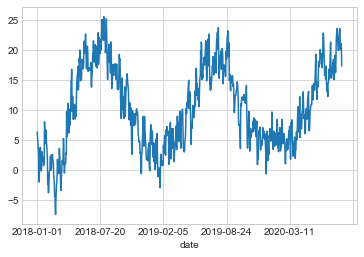

In [16]:
#Generate plot of data - dayly average
avg_temp = df.groupby('date')['value'].agg('mean')
avg_temp.plot()
plt.show()

Text(0.5, 0, '')

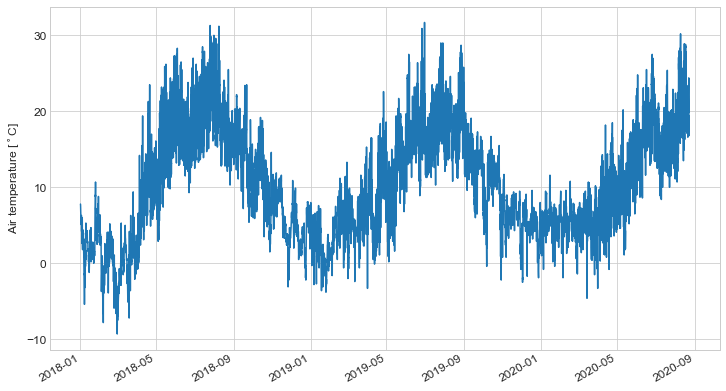

In [17]:
#Deletes data duplicates
df2 = df.set_index(['time', 'parameterId']).drop_duplicates().unstack(level=-1)['value'].copy()

#Generate plot of data - 10 min
ax = df2['temp_dry'].interpolate().plot(figsize=(12,7), legend=False, fontsize=12, subplots=True)
ax[0].set_ylabel('Air temperature [$^\circ$C]', size=12)
ax[0].set_xlabel('', size=12)